### РОССИЙСКИЙ УНИВЕРСИТЕТ ДРУЖБЫ НАРОДОВ

#### Факультет физико-математических и естественных наук  
#### Кафедра информационных технологий 

## ОТЧЕТ ПО ЛАБОРАТОРНОЙ РАБОТЕ № 1


### Дисциплина: ИАД

##### Студент: Ким Реачна
##### Группа: НПИбд-01-20

## Москва 2023
***

### Вариант № 13

1. Используя функционал библиотеки Pandas, cчитайте заданный набор данных из репозитария UCI. Набор данных задан ссылкой на страницу набора данных и названием файла с данными, который доступен из папки с данными (data folder).

In [56]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_classif
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
data1 = pd.read_csv("horse-colic.data", header=None, sep=' ',on_bad_lines='skip')

In [57]:
data1

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,2,1,530101,38.50,66,28,3,3,?,2,...,45.00,8.40,?,?,2,2,11300,0,0,2
1,1,1,532349,38.4,44,24,3,?,4,?,...,50,77,?,?,1,1,3205,0,0,2
2,2,1,5275212,37.80,82,12,3,1,1,2,...,50.00,7.00,?,?,3,1,2205,0,0,2
3,2,9,5305129,39.50,84,30,?,?,?,1,...,28.00,5.00,?,?,1,2,0,0,0,2
4,1,1,529428,?,?,?,?,?,?,?,...,?,?,?,?,1,1,2124,0,0,2
5,1,1,529126,38.00,50,36,?,1,1,1,...,39.00,6.60,1,5.30,1,1,8400,0,0,1
6,2,1,535054,38.6,45,16,2,1,2,1,...,43,58,?,?,1,2,0,0,0,2
7,1,1,528890,38.90,80,44,3,3,3,1,...,54.00,6.50,3,?,2,1,7111,0,0,2
8,1,1,530034,37.00,66,20,1,3,2,1,...,35.00,6.90,2,?,2,1,31110,0,0,2
9,1,1,534004,?,78,24,3,3,3,1,...,43,62,?,2,3,2,2209,0,0,2


2. Проведите исследование набора данных, выявляя числовые признаки. Если какие-то из числовых признаков были неправильно классифицированы, то преобразуйте их в числовые. Если в наборе для числовых признаков присутствуют пропущенные значения ('?'), то заполните их медианными значениями признаков.

In [58]:
data1 = data1.replace("?",np.nan)

In [59]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 28 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       15 non-null     int64 
 1   1       15 non-null     int64 
 2   2       15 non-null     int64 
 3   3       12 non-null     object
 4   4       14 non-null     object
 5   5       14 non-null     object
 6   6       12 non-null     object
 7   7       11 non-null     object
 8   8       12 non-null     object
 9   9       13 non-null     object
 10  10      12 non-null     object
 11  11      12 non-null     object
 12  12      10 non-null     object
 13  13      8 non-null      object
 14  14      7 non-null      object
 15  15      1 non-null      object
 16  16      10 non-null     object
 17  17      11 non-null     object
 18  18      14 non-null     object
 19  19      13 non-null     object
 20  20      5 non-null      object
 21  21      4 non-null      object
 22  22      15 non-null     int6

In [60]:
data1 = data1.astype(float)

In [61]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 28 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       15 non-null     float64
 1   1       15 non-null     float64
 2   2       15 non-null     float64
 3   3       12 non-null     float64
 4   4       14 non-null     float64
 5   5       14 non-null     float64
 6   6       12 non-null     float64
 7   7       11 non-null     float64
 8   8       12 non-null     float64
 9   9       13 non-null     float64
 10  10      12 non-null     float64
 11  11      12 non-null     float64
 12  12      10 non-null     float64
 13  13      8 non-null      float64
 14  14      7 non-null      float64
 15  15      1 non-null      float64
 16  16      10 non-null     float64
 17  17      11 non-null     float64
 18  18      14 non-null     float64
 19  19      13 non-null     float64
 20  20      5 non-null      float64
 21  21      4 non-null      float64
 22  22  

In [62]:
data1.isna().sum()

0      0
1      0
2      0
3      3
4      1
5      1
6      3
7      4
8      3
9      2
10     3
11     3
12     5
13     7
14     8
15    14
16     5
17     4
18     1
19     2
20    10
21    11
22     0
23     0
24     0
25     0
26     0
27     0
dtype: int64

In [63]:
data1 = data1.fillna(data1.median())

3. Определите столбец, содержащий метку класса (отклик). Если столбец, содержащий метку класса (отклик), принимает более 10 различных значений, то выполните дискретизацию этого столбца, перейдя к 4-5 диапазонам значений.

In [64]:
target = data1[0]
data1 = data1.drop([0],axis=1)

In [65]:
target.unique()

array([2., 1.])

4. При помощи класса SelectKBest библиотеки scikit-learn найдите в наборе два признака, имеющих наиболее выраженную взаимосвязь с (дискретизированным) столбцом с меткой класса (откликом). Используйте для параметра score_func значения chi2 или f_classif.

In [66]:
from sklearn.preprocessing import LabelEncoder
target = pd.Series(LabelEncoder().fit_transform(target))

In [67]:
data = data1.select_dtypes(exclude=['object'])
# отбор признаков при помощи одномерных статистических тестов 
from sklearn.feature_selection import SelectKBest, chi2

X = data 
Y = target   

# отбор признаков
test = SelectKBest(score_func=chi2, k=2)
fit = test.fit(X, Y)

# оценки признаков
print("\nОценки признаков:\n",fit.scores_)

cols = test.get_support(indices=True)
data = data.iloc[:,cols]
print("\nОтобранные признаки:\n",data.head())


Оценки признаков:
 [4.17391304e+00 7.77826292e+06 2.10887332e-02 6.03937130e+00
 1.80868878e+01 3.21428571e-01 1.33796296e+00 5.85365854e-01
 4.29824561e-01 7.57575758e-03 6.40151515e-01 3.87596899e-03
 0.00000000e+00 1.48148148e-01 0.00000000e+00 3.40909091e-02
 5.73099415e-01 3.54243542e+00 3.88759886e-01 1.42857143e-01
 6.89118322e-03 6.17283951e-03 5.07936508e-01 1.30566786e+04
            nan            nan 6.17283951e-03]

Отобранные признаки:
           2        24
0   530101.0  11300.0
1   532349.0   3205.0
2  5275212.0   2205.0
3  5305129.0      0.0
4   529428.0   2124.0


In [68]:
a,b=data.columns

5. Для найденных признаков и (дискретизированного) столбца с меткой класса (откликом) вычислите матрицу корреляций и визуализируйте ее в виде тепловой карты (heat map).

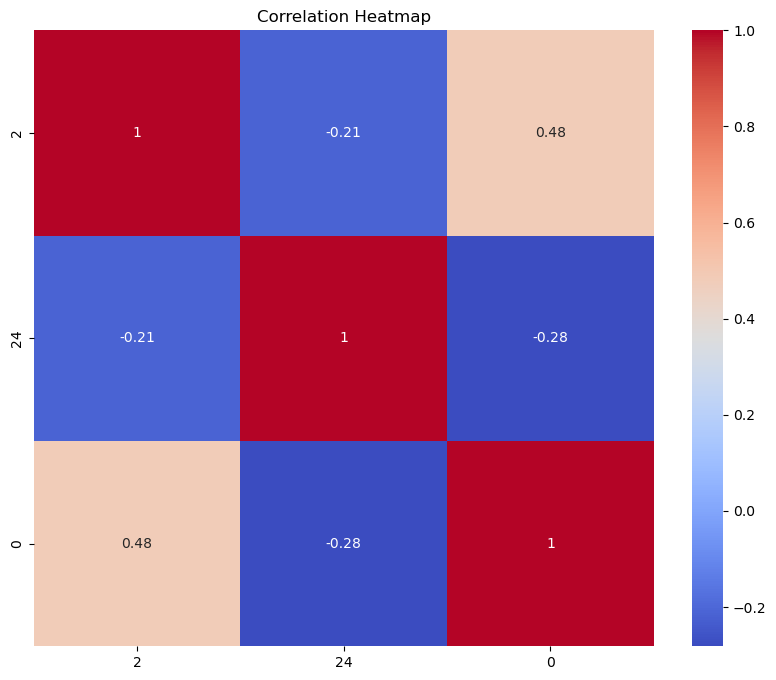

In [69]:
correlation_matrix = (pd.concat([data,target],axis=1)).corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

6. Визуализируйте набор данных в виде диаграммы рассеяния на плоскости с координатами, соответствующими найденным признакам, отображая точки различных классов разными цветами. Подпишите оси и рисунок, создайте легенду набора данных.

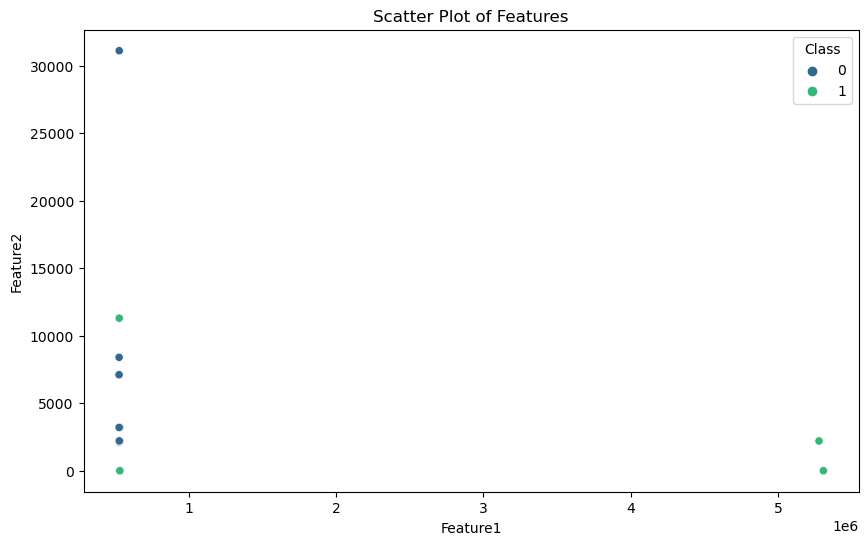

In [70]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.xlabel('Feature1')
plt.ylabel('Feature2')
plt.title('Scatter Plot of Features')

sns.scatterplot(data=data, x=data[2], y=data[24], hue=target, palette='viridis')

plt.legend(title='Class')

plt.show()

7. Оставляя в наборе данных только числовые признаки, найдите и выведите на экран размерность метода главных компонент (параметр n_components), для которой доля объясняемой дисперсии будет не менее 97.5%.

In [71]:
from sklearn.decomposition import PCA 

data = data1.select_dtypes(include=['number'])

for r in range(1,5):
  pca = PCA( n_components = r )
  pca.fit(data)
  print( "r =",r,"\tДисперсия =",
        sum(pca.explained_variance_ratio_)*100,"%" )

r = 1 	Дисперсия = 99.99790826857856 %
r = 2 	Дисперсия = 99.99999995154984 %
r = 3 	Дисперсия = 99.9999999773843 %
r = 4 	Дисперсия = 99.99999999534211 %


In [72]:
cumulative_variance = pca.explained_variance_ratio_.cumsum()
n_components = len(cumulative_variance[cumulative_variance <= 0.975])+1

print(f"Количество компонент для объяснения 97.5% дисперсии: {n_components}")

Количество компонент для объяснения 97.5% дисперсии: 1


8. Пользуясь методом главных компонент (PCA), снизьте размерность набора данных до двух признаков и изобразите полученный набор данных в виде диаграммы рассеяния на плоскости, образованной двумя полученными признаками, отображая точки различных классов разными цветами. Подпишите оси и рисунок, создайте легенду набора данных

In [73]:
pca = PCA(n_components=2)
fit = pca.fit(data)
data = pd.DataFrame(fit.transform(data))

data

,0,1
0,-6.355591e+05,5429.161890
1,-6.333030e+05,-2663.666175
2,4.109559e+06,1098.961263
3,4.139478e+06,-1075.986680
4,-6.362229e+05,-3747.497139
5,-6.365312e+05,2528.192265
6,-6.305948e+05,-5865.914702
7,-6.367659e+05,1238.949299
8,-6.356460e+05,25239.069179
9,-6.316470e+05,-3657.981561


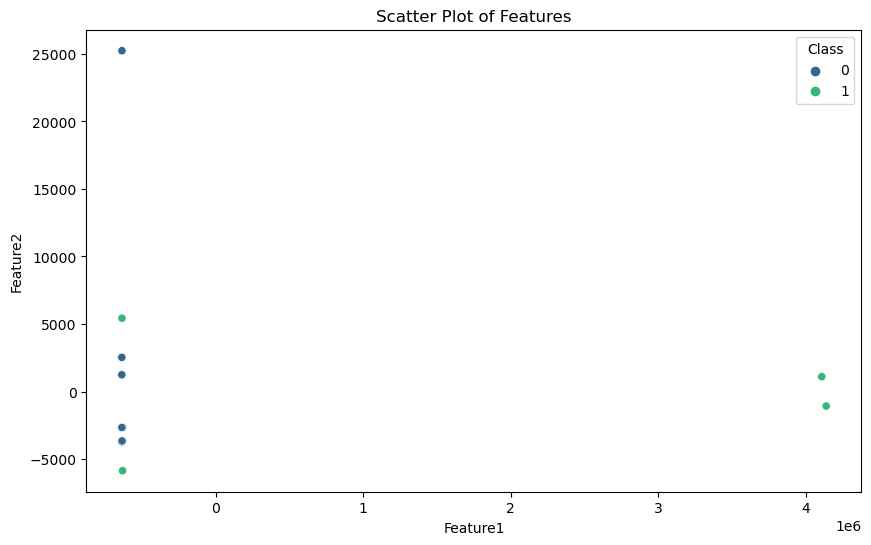

In [74]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.xlabel('Feature1')
plt.ylabel('Feature2')
plt.title('Scatter Plot of Features')

sns.scatterplot(data=data, x=data[0], y=data[1], hue=target, palette='viridis')

plt.legend(title='Class')

plt.show()